In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 

# visualization style
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 6))


TRAIN_DATA_PATH = r".\data\raw\train.csv"
TEST_DATA_PATH = r".\data\raw\test.csv" 

try:
    df_train = pd.read_csv(TRAIN_DATA_PATH)
    df_test = pd.read_csv(TEST_DATA_PATH)
    print("Dati caricati con successo.")
    print(f"Dimensioni Train: {df_train.shape}")
    print(f"Dimensioni Test: {df_test.shape}")
except FileNotFoundError:
    print("Errore: File CSV non trovati. Verifica i percorsi.")
    exit()

train_id = df_train['Id']
test_id = df_test['Id']

df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

print("\nColonna 'Id' rimossa.")

df_train = pd.read_csv(TRAIN_DATA_PATH)

print(df_train.head())
print(df_train.info())

Dati caricati con successo.
Dimensioni Train: (1460, 81)
Dimensioni Test: (1459, 80)

Colonna 'Id' rimossa.
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    N

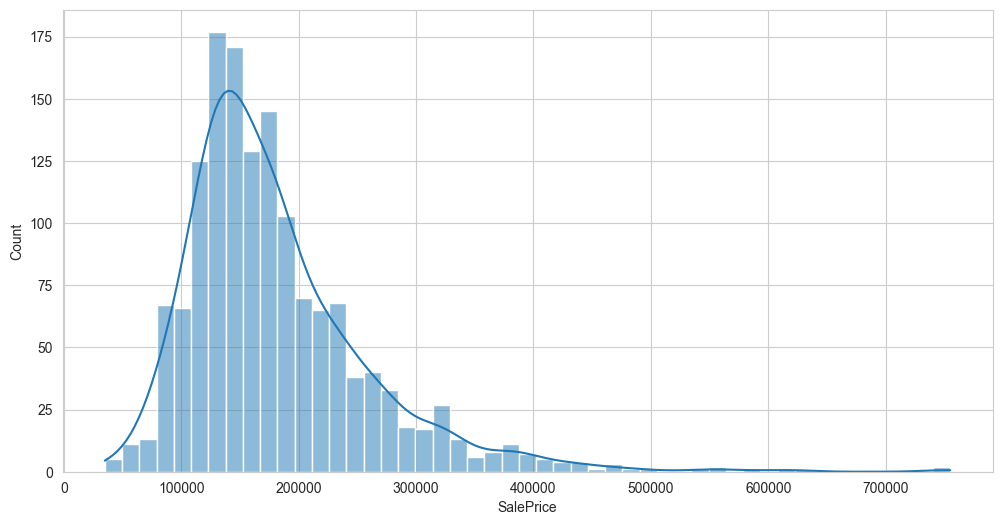

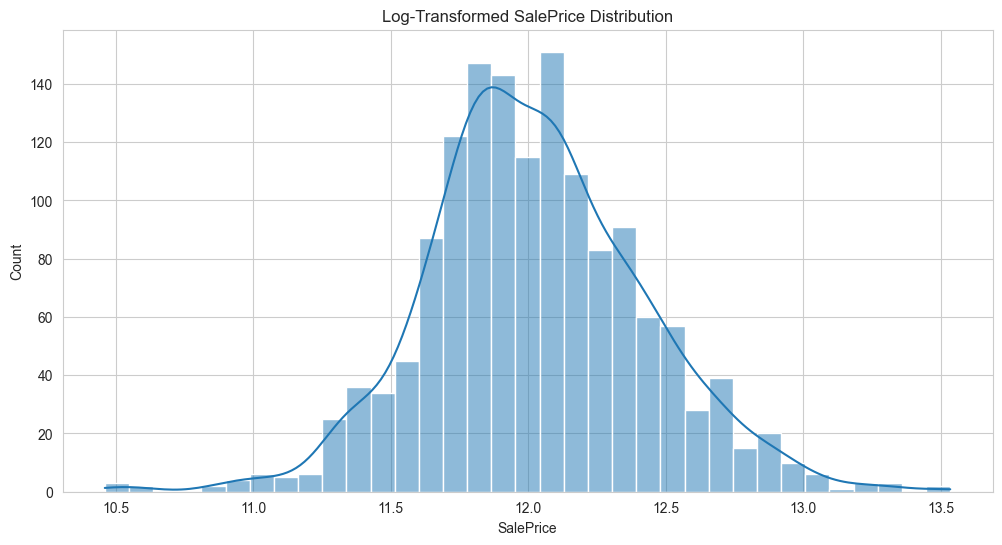

In [16]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.show()
sns.histplot(np.log1p(df_train['SalePrice']), kde=True) 
plt.title('Log-Transformed SalePrice Distribution')
plt.show()

In [17]:
missing_values = df_train.isnull().sum()
missing_percent = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'count': missing_values, 'percent': missing_percent})
print(missing_df[missing_df['count'] > 0].sort_values(by='percent', ascending=False))

              count    percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


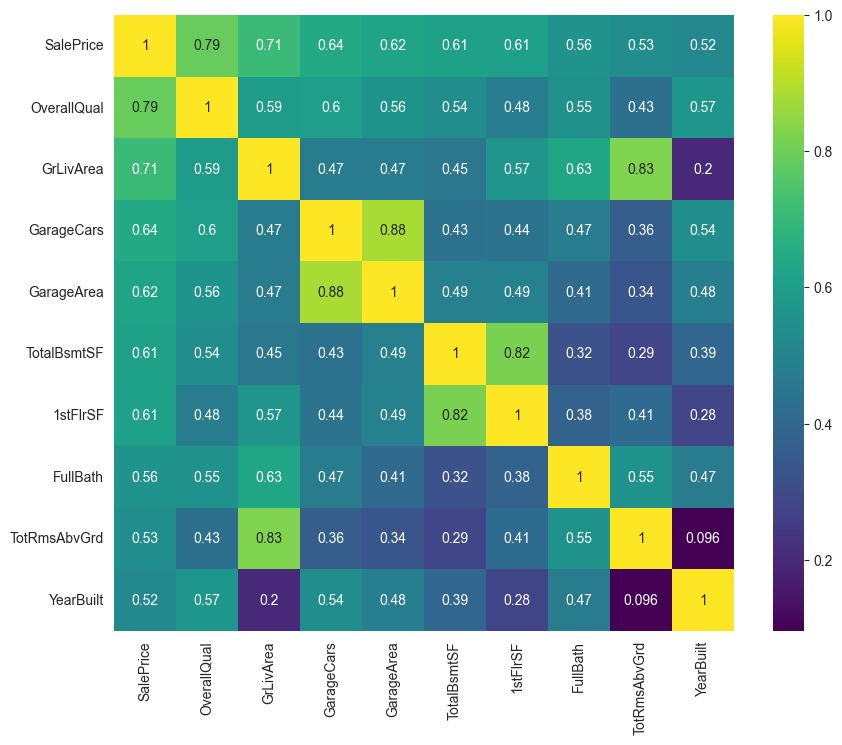

In [18]:
numeric_cols = df_train.select_dtypes(include=np.number).columns
corr_matrix = df_train[numeric_cols].corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False).head(20)) 
k = 10 
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_train[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

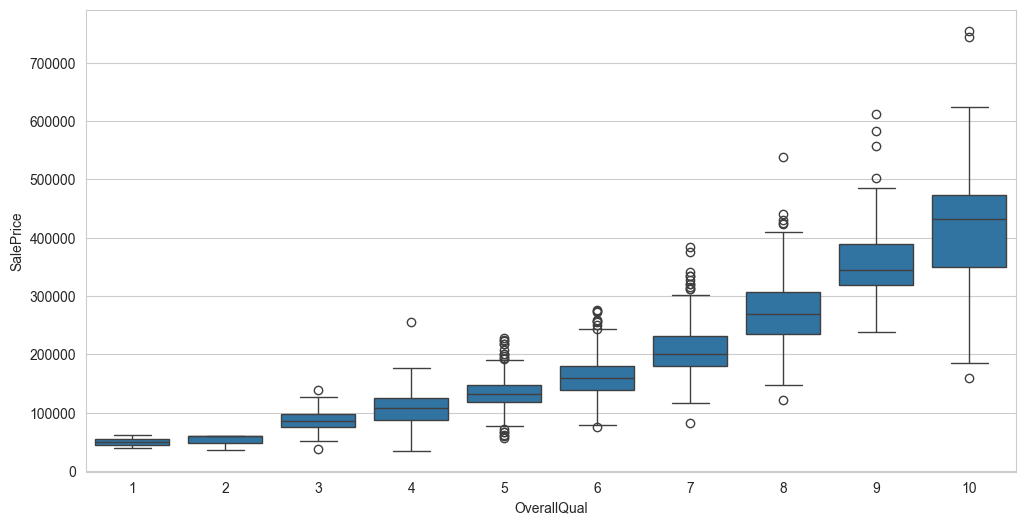

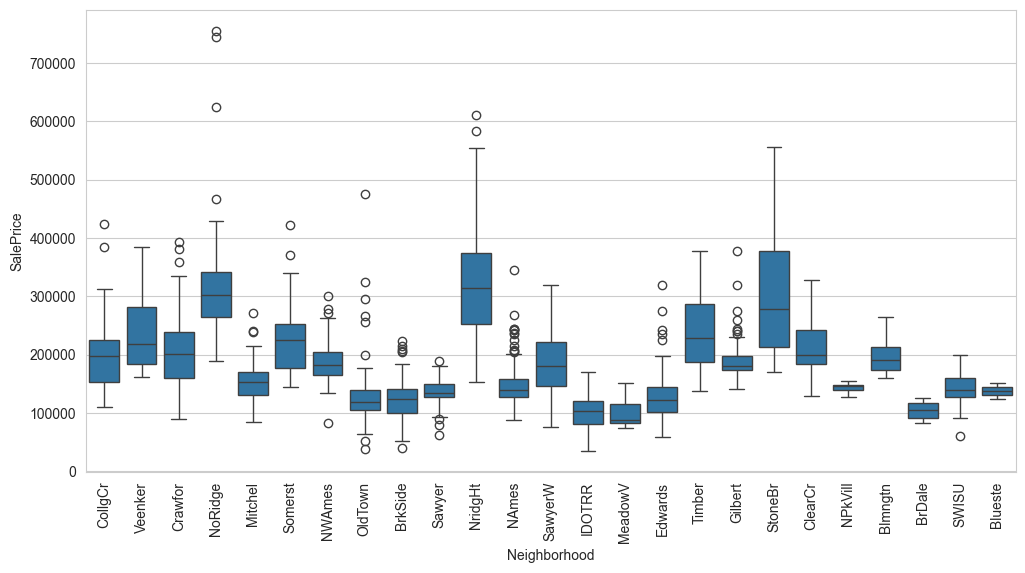

In [19]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.show()

categorical_feature = 'Neighborhood' 
plt.figure(figsize=(12, 6))
sns.boxplot(x=categorical_feature, y='SalePrice', data=df_train)
plt.xticks(rotation=90)
plt.show()

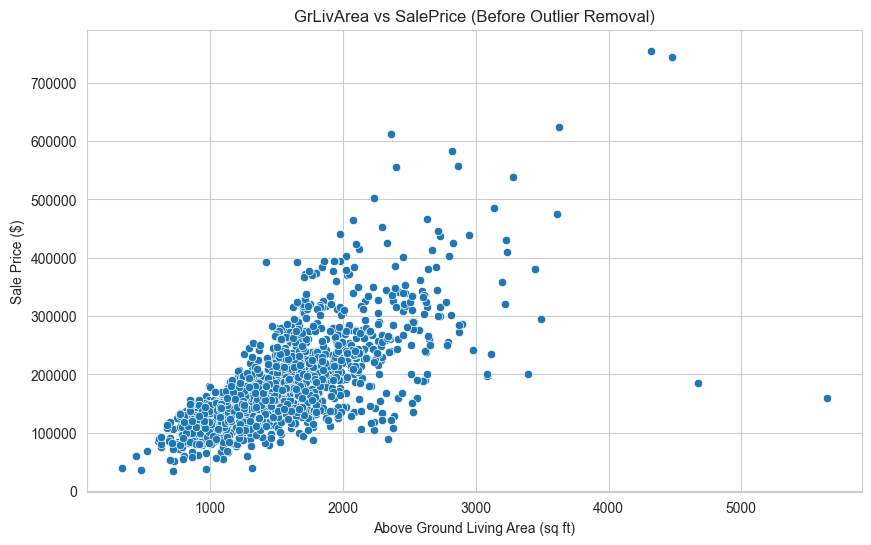

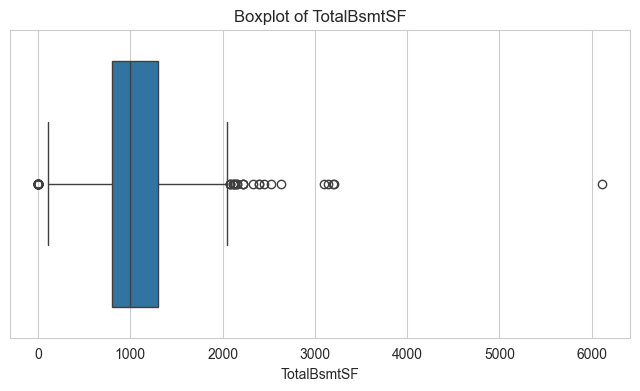

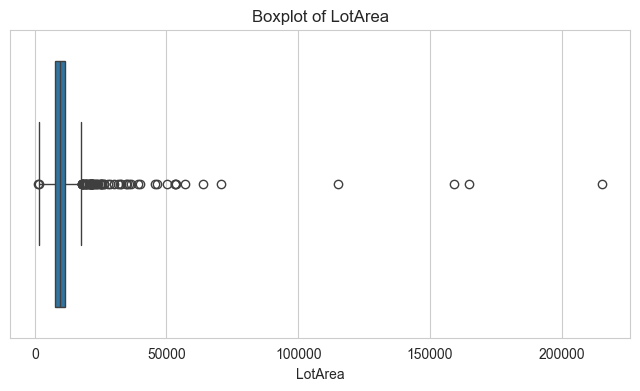

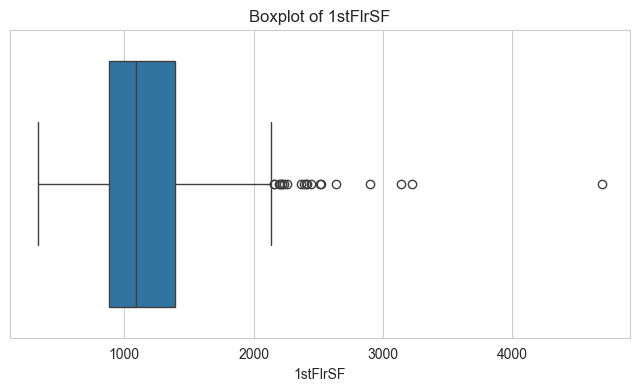

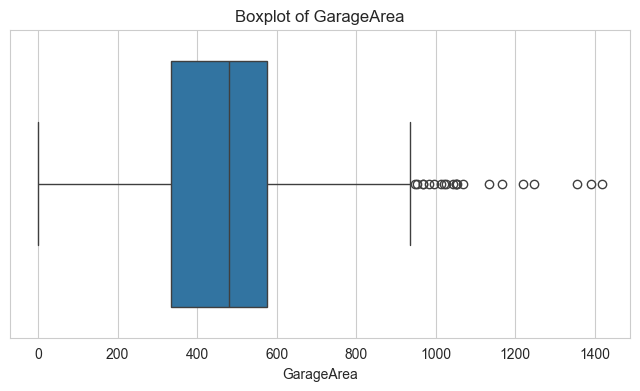

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')


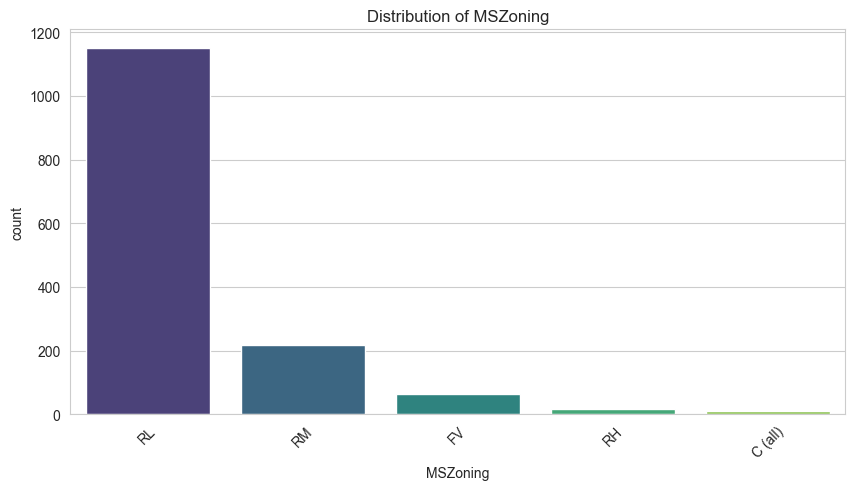

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')


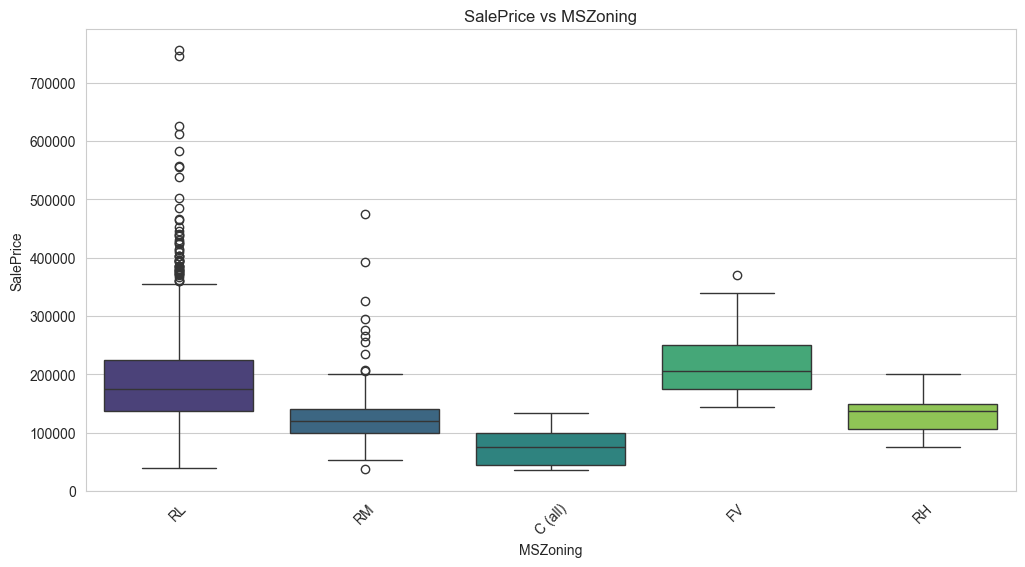

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')


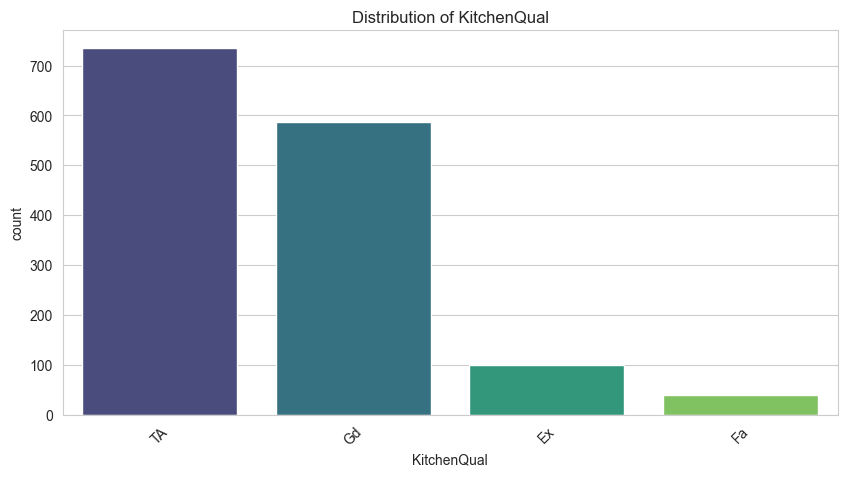

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')


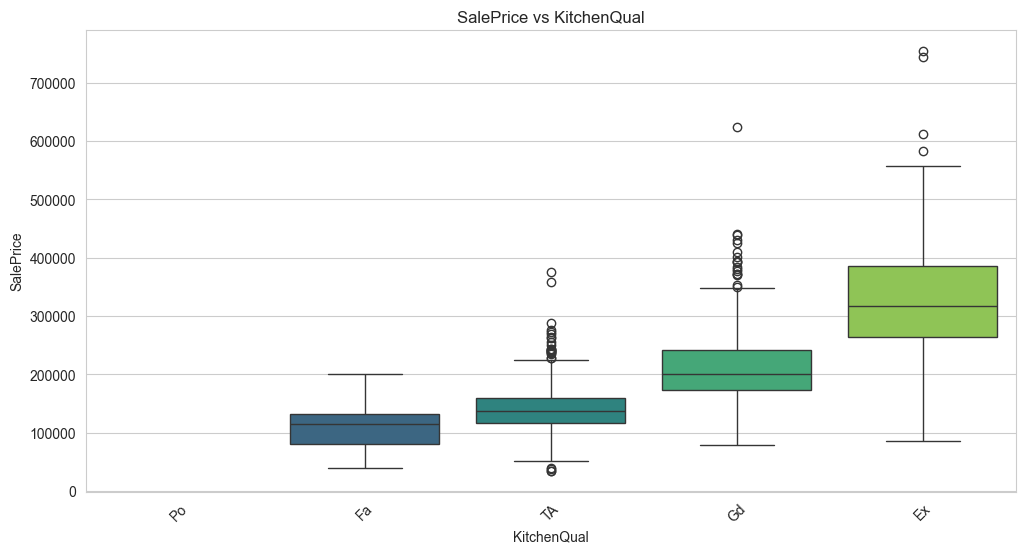

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')


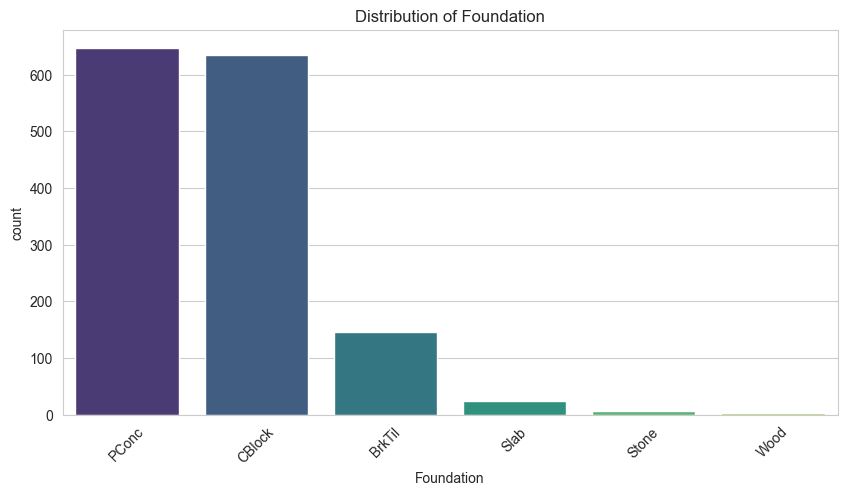

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')


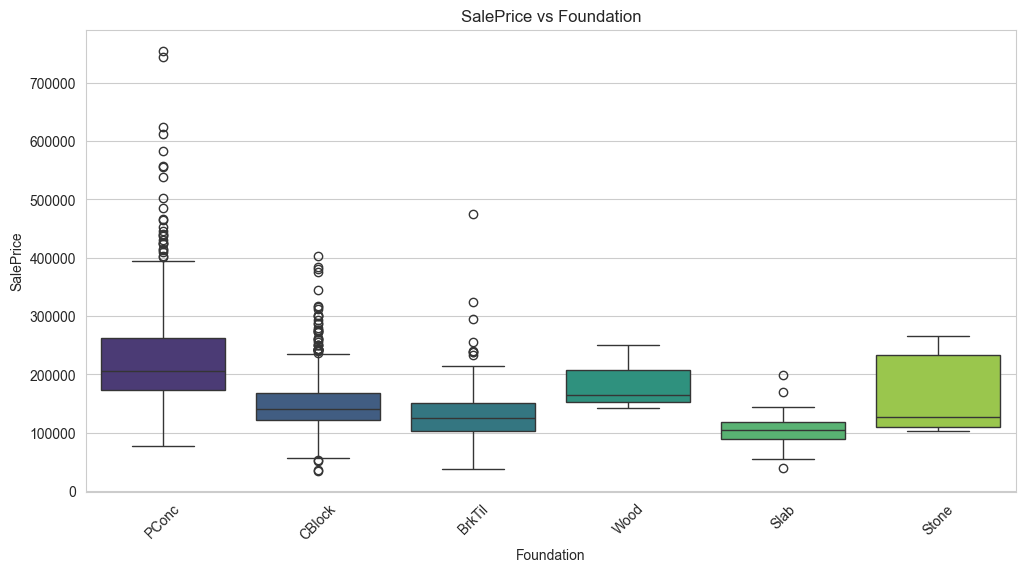

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')


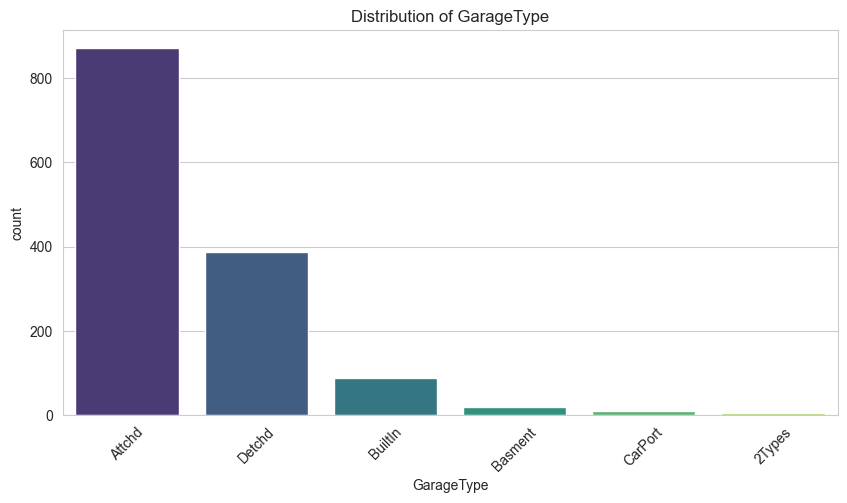

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')


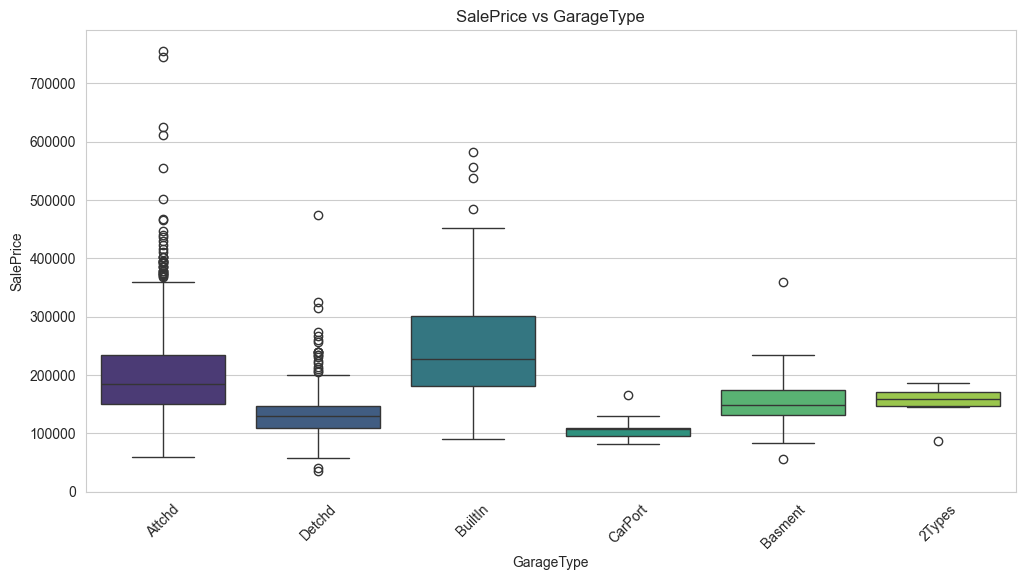

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')


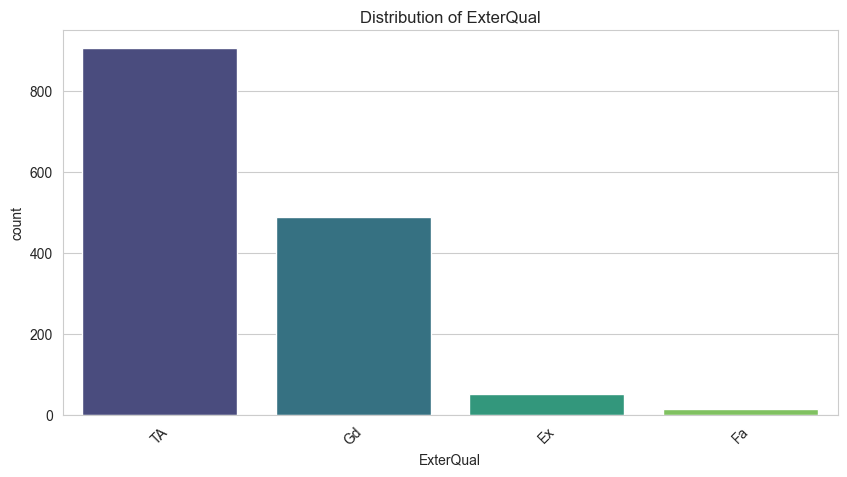

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')


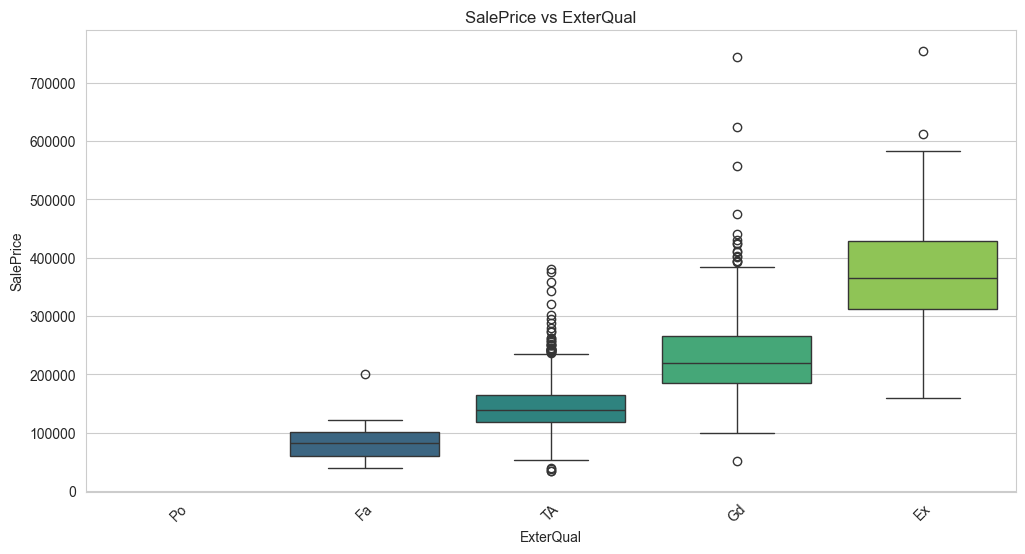

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YrSold', y='SalePrice', data=df_train, palette='viridis')


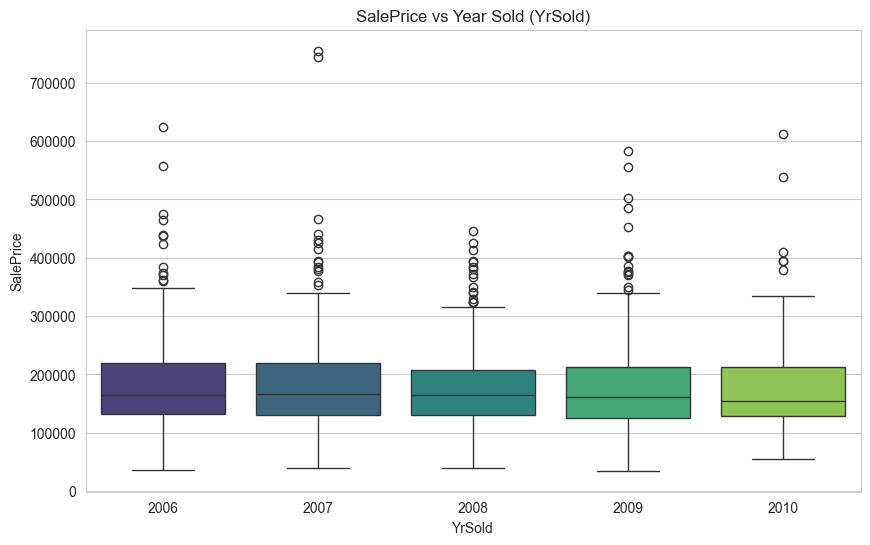

C:\Users\palli\AppData\Local\Temp\ipykernel_14180\3378758564.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MoSold', y='SalePrice', data=df_train, palette='viridis')


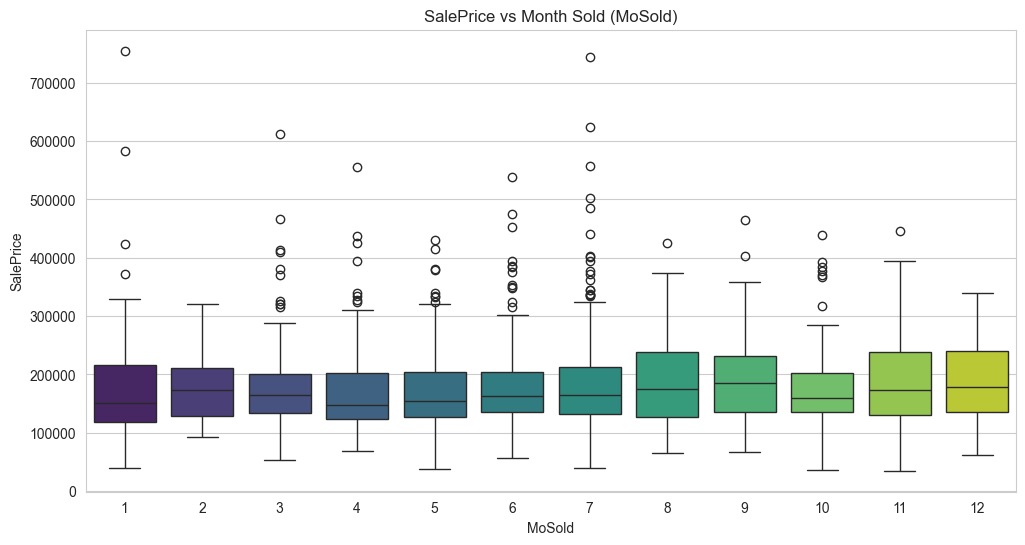

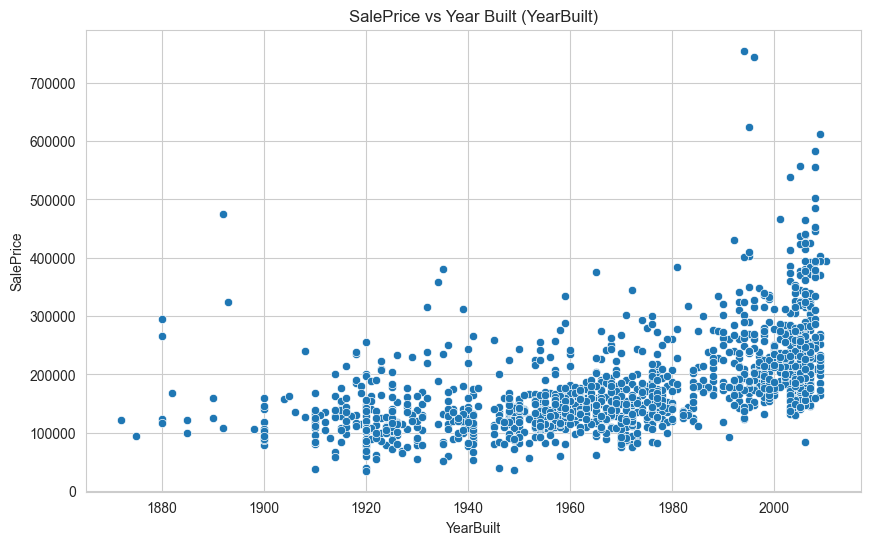

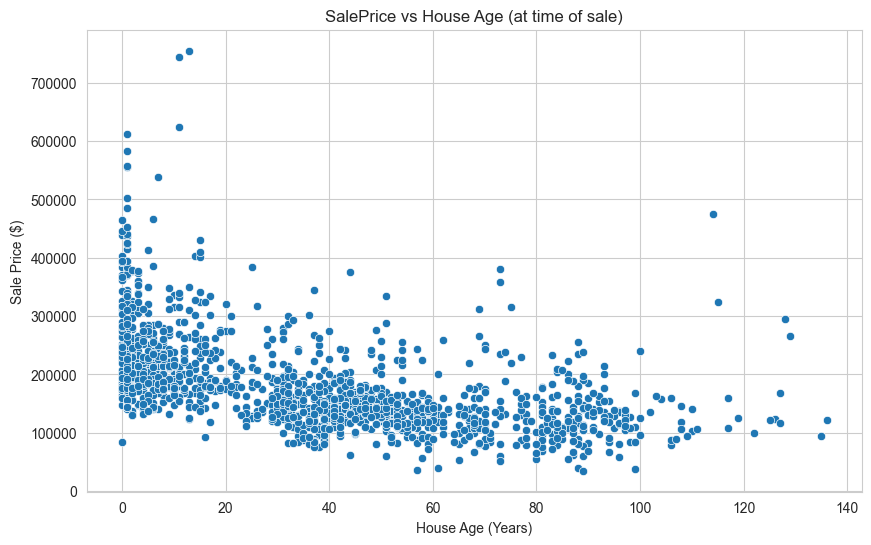


Skewness of numerical features (top 15):
                Skewness
MiscVal        24.451640
PoolArea       14.813135
LotArea        12.195142
3SsnPorch      10.293752
LowQualFinSF    9.002080
KitchenAbvGr    4.483784
BsmtFinSF2      4.250888
ScreenPorch     4.117977
BsmtHalfBath    4.099186
EnclosedPorch   3.086696
MasVnrArea      2.666326
OpenPorchSF     2.361912
LotFrontage     2.160866
BsmtFinSF1      1.683771
WoodDeckSF      1.539792

Features with skewness > 0.75: 21


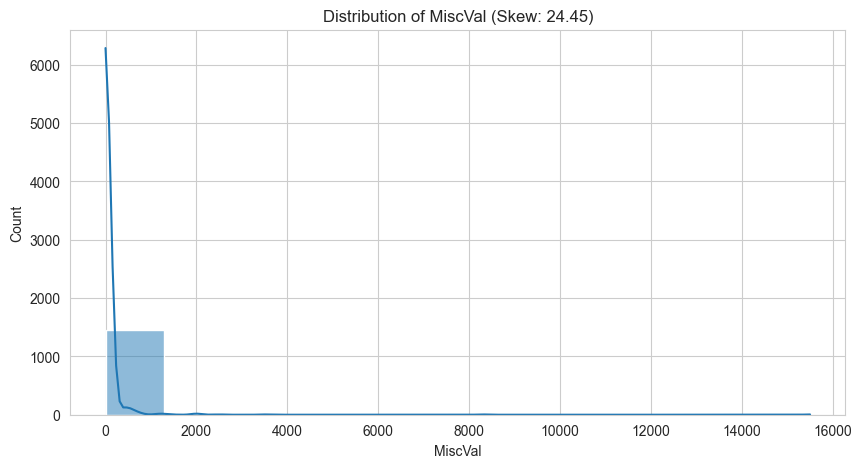

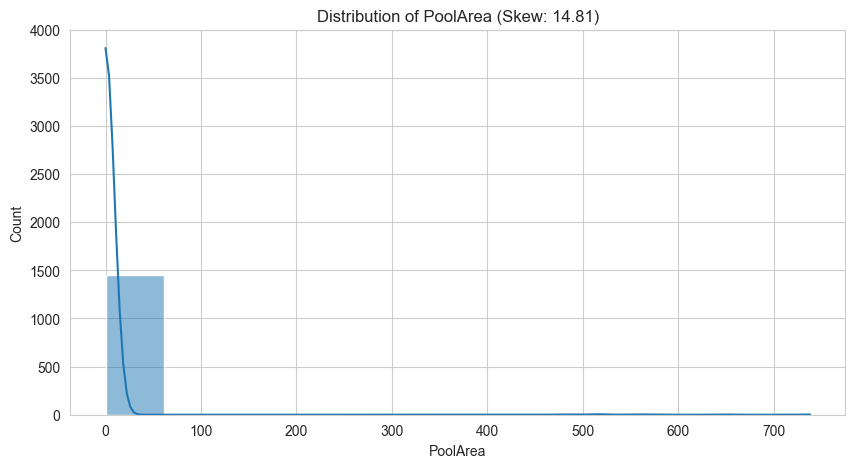

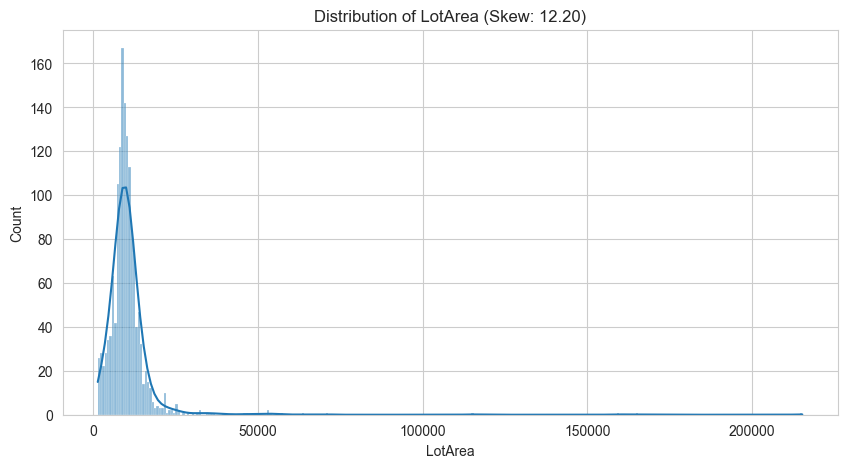

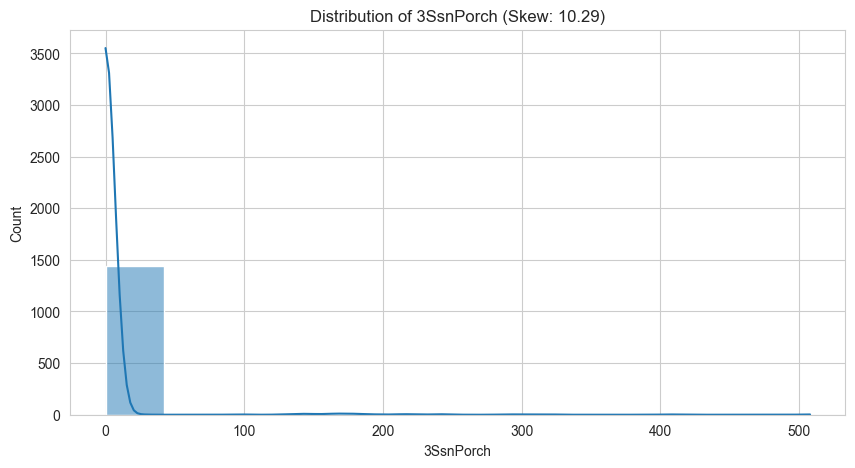

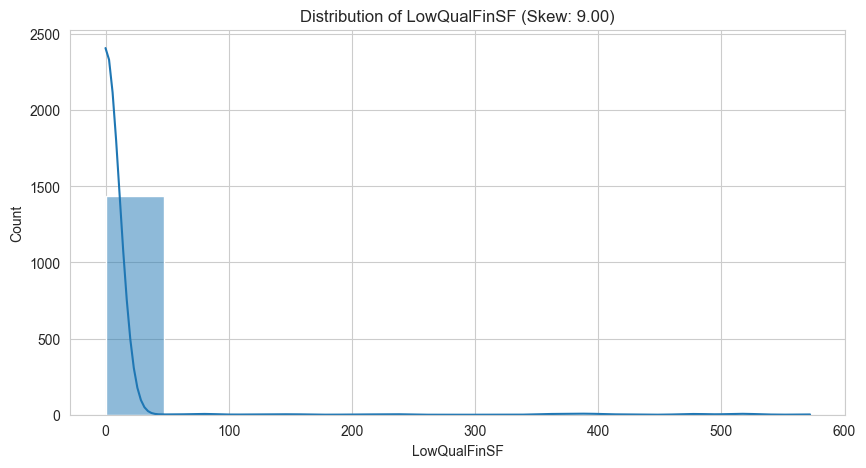

In [20]:
# 2.1 Outlier Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('GrLivArea vs SalePrice (Before Outlier Removal)')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# Boxplots for other important numerical features
numeric_features_check = ['TotalBsmtSF', 'LotArea', '1stFlrSF', 'GarageArea']
for col in numeric_features_check:
    if col in df_train.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_train[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
    else:
        print(f"Column {col} not found in the training set.")


# 2.2 Categorical Features Analysis
categorical_features_check = ['MSZoning', 'KitchenQual', 'Foundation', 'GarageType', 'ExterQual']
for col in categorical_features_check:
     if col in df_train.columns:
        # Countplot for distribution
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df_train[col], order=df_train[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

        # Boxplot vs SalePrice
        order = None
        # Define order for ordinal features if needed
        if col == 'KitchenQual' or col == 'ExterQual':
             order = ['Po', 'Fa', 'TA', 'Gd', 'Ex'] # Poor, Fair, Typical/Average, Good, Excellent

        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df_train[col], y=df_train['SalePrice'], order=order, palette='viridis')
        plt.title(f'SalePrice vs {col}')
        plt.xticks(rotation=45)
        plt.show()
     else:
        print(f"Column {col} not found in the training set.")

# 2.3 Temporal Analysis
temporal_features = ['YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd']
# Boxplot Year/Month Sold vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=df_train, palette='viridis')
plt.title('SalePrice vs Year Sold (YrSold)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=df_train, palette='viridis')
plt.title('SalePrice vs Month Sold (MoSold)')
plt.show()

# Scatter Plot Year Built vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['YearBuilt'], y=df_train['SalePrice'])
plt.title('SalePrice vs Year Built (YearBuilt)')
plt.show()

# Create and plot House Age vs SalePrice
# Ensure 'YrSold' and 'YearBuilt' exist before this step
if 'YrSold' in df_train.columns and 'YearBuilt' in df_train.columns:
    df_train['HouseAge_EDA'] = df_train['YrSold'] - df_train['YearBuilt']
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_train['HouseAge_EDA'], y=df_train['SalePrice'])
    plt.title('SalePrice vs House Age (at time of sale)')
    plt.xlabel('House Age (Years)')
    plt.ylabel('Sale Price ($)')
    plt.show()
    # Drop temporary column if not needed later
    # df_train = df_train.drop('HouseAge_EDA', axis=1)
else:
    print("Columns 'YrSold' or 'YearBuilt' not found for HouseAge calculation.")


# 2.4 Numerical Feature Skewness Analysis
numeric_cols = df_train.select_dtypes(include=np.number).columns
# Ensure 'SalePrice' exists before attempting to drop it
if 'SalePrice' in numeric_cols:
    numeric_cols = numeric_cols.drop('SalePrice')
else:
    print("'SalePrice' not found in numeric columns.")

# Calculate skewness only if numeric_cols is not empty
if not numeric_cols.empty:
    skewness = df_train[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skew_df = pd.DataFrame({'Skewness': skewness})
    print("\nSkewness of numerical features (top 15):")
    print(skew_df.head(15))

    # Identify highly skewed features
    highly_skewed = skew_df[abs(skew_df['Skewness']) > 0.75].index
    print(f"\nFeatures with skewness > 0.75: {len(highly_skewed)}")

    # Plot distribution for the most skewed features (e.g., top 5)
    for col in highly_skewed[:5]:
         if col in df_train.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(df_train[col], kde=True)
            plt.title(f'Distribution of {col} (Skew: {skewness[col]:.2f})')
            plt.show()
         else:
            # This condition might be redundant if numeric_cols is derived correctly
            print(f"Column {col} not found in the training set (for plotting).")
else:
    print("No numerical columns (excluding SalePrice) found to calculate skewness.")

